<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Packages" data-toc-modified-id="Importing-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Packages</a></span></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Baseline Model</a></span></li></ul></div>

## Importing Packages

- model interpetation 
- coeffs on time lags

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Import ARIMA model.
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import math



%matplotlib inline

# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import itertools

import warnings
warnings.filterwarnings("ignore")

In [2]:
# #CREATE FUNCTION THAT READS IN CSV AND AND CLEANS DATA
# def data_reader_cleaner(df):
# # 1) read in csv
# data = pd.read_csv('./data/data_1.csv')
# # 2) reset_index
# data.reset_index(inplace=True)
# # 3)set colunms as row 0 
# data.columns = data.iloc[0]
# # 4) drop first and last columns
# data.drop([0,31], axis = 0, inplace = True)
# # 5) set index as date
#  data.set_index('Date', inplace = True)   
# 6) concats
# return df

In [3]:
#Second function 
# needs to graph all features besides week days 

# need log transform as needed AFTER GRAHPING 


# MODIFY CODE FROM ARIMA SOLUTION TO PRINT RMSE
# GRAPH PREDICITON REDISUALS


# RESEARCH .PREDICT VS .FORECAST

In [4]:
data = pd.read_csv('./data/data_1.csv')

In [5]:
data_2 = pd.read_csv('./data/data_2.csv')

In [6]:
data_3 = pd.read_csv('./data/data_3.csv')

In [7]:
data_4 = pd.read_csv('./data/data_4.csv')

In [8]:
data_5 = pd.read_csv('./data/data_5.csv')

In [9]:
data.reset_index(inplace=True)

In [10]:
data_2.reset_index(inplace=True)

In [11]:
data_3.reset_index(inplace=True)

In [12]:
data_4.reset_index(inplace=True)

In [13]:
data_5.reset_index(inplace=True)

In [14]:
data.columns = data.iloc[0]

In [15]:
data_2.columns = data_2.iloc[0]

In [16]:
data_3.columns = data_3.iloc[0]

In [17]:
data_4.columns = data_4.iloc[0]

In [18]:
data_5.columns = data_5.iloc[0]

In [19]:
data_2.columns

Index(['Date', 'Day of the Week', 'Bill Count', 'Voids', 'Gross Sales',
       'Discounts', 'Net Sales', 'Menu Item Cost', 'Labor Cost', 'Margin'],
      dtype='object', name=0)

In [20]:
data.shape

(32, 10)

In [21]:
data_2.shape

(185, 10)

In [22]:
data_3.shape

(183, 10)

In [23]:
data_4.shape

(182, 10)

In [24]:
data_5.shape

(49, 10)

In [25]:
data.drop([0,31], axis = 0, inplace = True)

In [26]:
data_2.drop([0,184], axis = 0, inplace = True)

In [27]:
data_3.drop([0,182], axis = 0, inplace = True)

In [28]:
data_4.drop([0,181], axis = 0, inplace = True)

In [29]:
data_5.drop([0,48], axis = 0, inplace = True)

In [30]:
data.set_index('Date', inplace = True)

In [31]:
data_2.set_index('Date', inplace = True)

In [32]:
data_3.set_index('Date', inplace = True)

In [33]:
data_4.set_index('Date', inplace = True)

In [34]:
data_5.set_index('Date', inplace = True)

In [35]:
data_2

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
Date,,,,,,,,,
2018-07-01,Sunday,94,$268.00,"$5,132.03",$0.00,"$5,132.03",$0.00,"$1,316.44","$3,815.59"
2018-07-02,Monday,75,$154.00,"$3,904.01",$0.00,"$3,904.01",$0.00,$855.73,"$3,048.28"
2018-07-03,Tuesday,72,$61.00,"$3,555.00",$0.00,"$3,555.00",$0.00,$909.48,"$2,645.52"
2018-07-04,Wednesday,66,$115.00,"$3,027.00",$6.00,"$3,021.00",$0.00,$744.24,"$2,276.76"
2018-07-05,Thursday,58,$39.00,"$2,809.00",$0.00,"$2,809.00",$0.00,"$1,060.46","$1,748.54"
...,...,...,...,...,...,...,...,...,...
2018-12-27,Thursday,76,$89.00,"$4,706.00",$6.60,"$4,699.40",$114.00,$696.53,"$3,888.87"
2018-12-28,Friday,82,$100.00,"$4,895.00",$10.00,"$4,885.00",$72.00,$833.36,"$3,979.64"
2018-12-29,Saturday,111,$124.00,"$6,307.00",$0.00,"$6,307.00",$212.00,"$1,244.73","$4,850.27"


In [36]:
data.describe()

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
count,30,30,30,30,30,30,30,30,30
unique,7,26,27,30,18,30,1,30,30
top,Friday,103,$127.00,"$2,623.00",$0.00,"$6,432.02",$0.00,"$1,440.93","$3,707.51"
freq,5,3,2,1,13,1,30,1,1


In [37]:
data_2.describe()

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
count,183,183,183,183,183,183,183,183,183
unique,7,88,135,182,103,179,38,182,182
top,Sunday,82,$86.00,"$3,555.00",$0.00,"$6,029.00",$0.00,"$1,136.97","$3,048.28"
freq,27,8,5,2,70,3,86,2,2


In [38]:
data_2.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [39]:
data.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [40]:
data_3.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [41]:
data_4.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [42]:
data_5.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [43]:
data_2

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
Date,,,,,,,,,
2018-07-01,Sunday,94,$268.00,"$5,132.03",$0.00,"$5,132.03",$0.00,"$1,316.44","$3,815.59"
2018-07-02,Monday,75,$154.00,"$3,904.01",$0.00,"$3,904.01",$0.00,$855.73,"$3,048.28"
2018-07-03,Tuesday,72,$61.00,"$3,555.00",$0.00,"$3,555.00",$0.00,$909.48,"$2,645.52"
2018-07-04,Wednesday,66,$115.00,"$3,027.00",$6.00,"$3,021.00",$0.00,$744.24,"$2,276.76"
2018-07-05,Thursday,58,$39.00,"$2,809.00",$0.00,"$2,809.00",$0.00,"$1,060.46","$1,748.54"
...,...,...,...,...,...,...,...,...,...
2018-12-27,Thursday,76,$89.00,"$4,706.00",$6.60,"$4,699.40",$114.00,$696.53,"$3,888.87"
2018-12-28,Friday,82,$100.00,"$4,895.00",$10.00,"$4,885.00",$72.00,$833.36,"$3,979.64"
2018-12-29,Saturday,111,$124.00,"$6,307.00",$0.00,"$6,307.00",$212.00,"$1,244.73","$4,850.27"


In [44]:
merge=pd.concat([data,data_2,data_3,data_4,data_5])

In [45]:
merge.dtypes

0
Day of the Week    object
Bill Count         object
Voids              object
Gross Sales        object
Discounts          object
Net Sales          object
Menu Item Cost     object
Labor Cost         object
Margin             object
dtype: object

In [46]:
t = ["Voids", "Gross Sales", "Discounts", "Net Sales", "Menu Item Cost", "Labor Cost", "Margin"]


In [47]:
merge[t] = merge[t].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [48]:
merge["Bill Count"] = merge["Bill Count"].astype(int)

In [49]:
merge = pd.concat([merge, pd.get_dummies(merge['Day of the Week'])], axis=1)

In [50]:
merge.drop('Day of the Week', axis = 1, inplace = True)

In [51]:
merge.sort_index(inplace = True)

In [52]:
#x_cols = ["Voids", "Discounts", "Net Sales", "Menu Item Cost", "Labor Cost", "Margin", "Bill Count",
         #"Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]

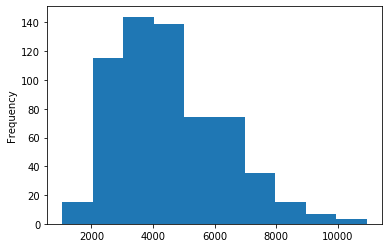

In [53]:
merge["Gross Sales"].plot(kind = "hist")
#log transform

#train model on log transform (log of gross sales)
#once fropecast is done take it and dexponeniate
# look at dists of feature if skwed then log transform as well

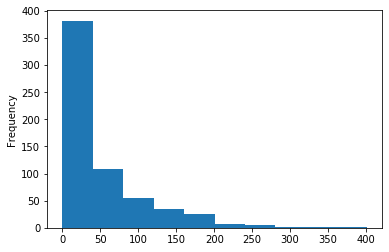

In [54]:
merge["Discounts"].plot(kind = "hist")

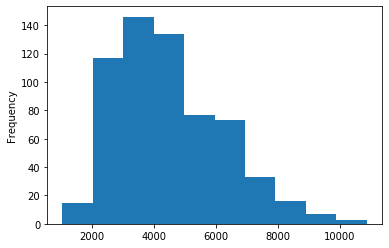

In [55]:
merge["Net Sales"].plot(kind = "hist")

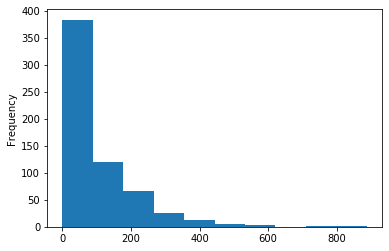

In [56]:
merge["Menu Item Cost"].plot(kind = "hist")

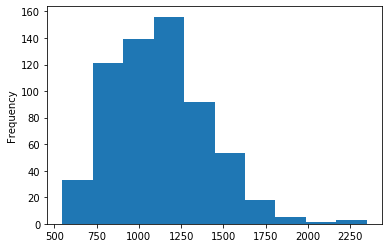

In [57]:
merge["Labor Cost"].plot(kind = "hist")

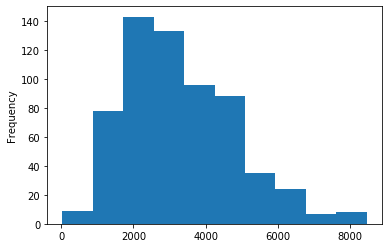

In [58]:
merge["Margin"].plot(kind = "hist")

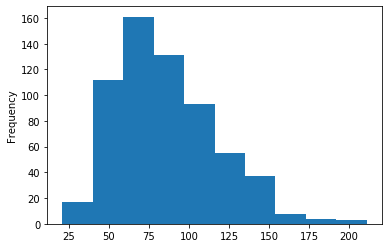

In [138]:
merge["Bill Count"].plot(kind = "hist")

## Baseline Model

In [59]:
merge["Gross Sales"].mean()

4563.761674718196

In [60]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    plt.figure(figsize=(12, 12))
    graph = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 
    return graph

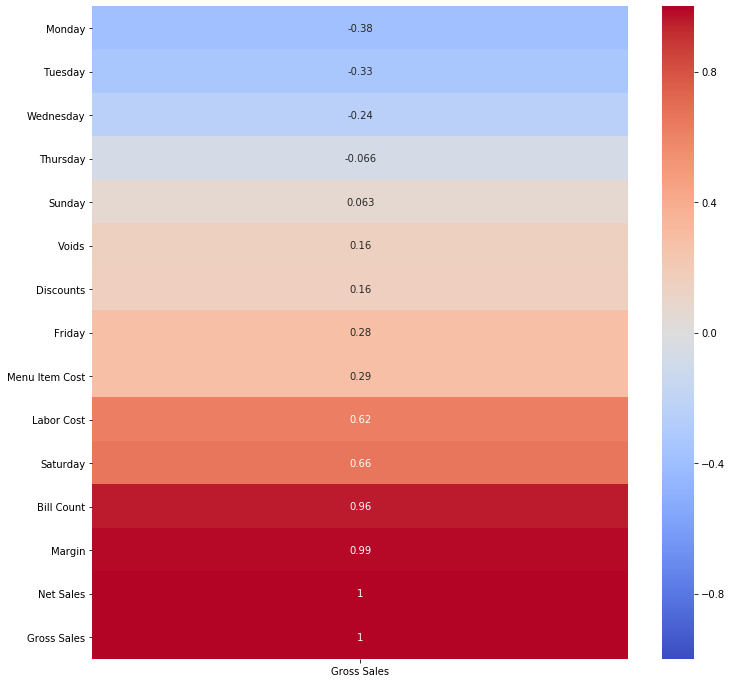

In [61]:
heatmap_numeric_w_dependent_variable(merge, "Gross Sales")

In [62]:
drop_corr_cols = ["Net Sales", "Margin"]

In [63]:
merge.drop(drop_corr_cols, axis = 1, inplace = True)

In [64]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

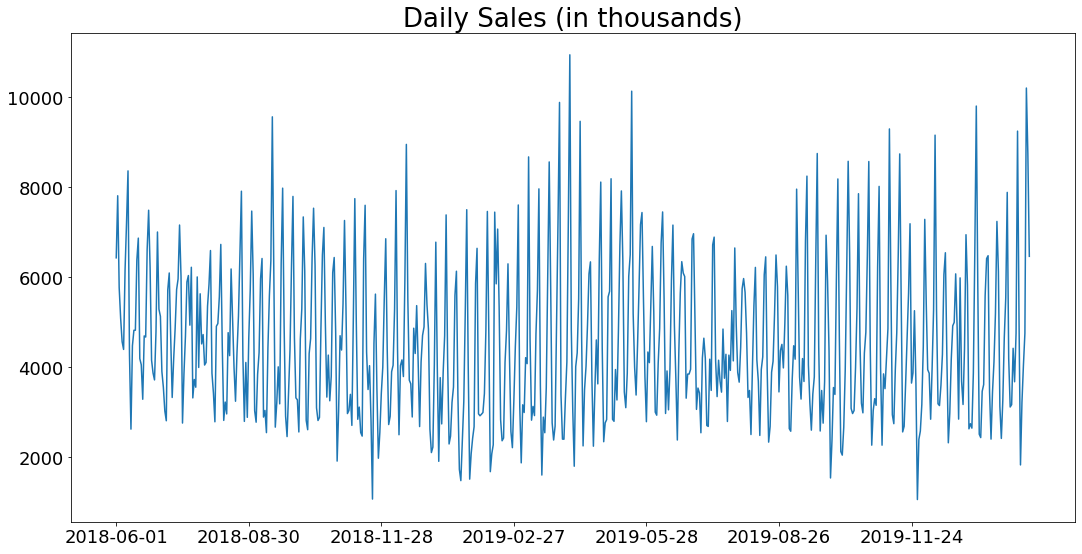

In [65]:
plot_series(merge, ['Gross Sales'], title = "Daily Sales (in thousands)", steps= 90)

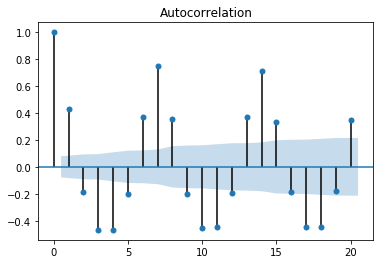

In [66]:
# Generate plot.
plot_acf(merge['Gross Sales'].dropna(), lags=20);

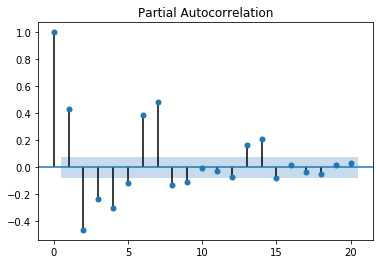

In [67]:
plot_pacf(merge['Gross Sales'].dropna(), lags=20);

In [68]:
# Run ADF test on original (non-differenced!) data.
adfuller(merge['Gross Sales'])

(-4.413893331869137,
 0.0002804708497872855,
 14,
 606,
 {'1%': -3.4411869900487906,
  '5%': -2.866321181236609,
  '10%': -2.569316262893616},
 9994.277564875969)

In [69]:
# Code written by Joseph Nelson.
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [70]:
# Run ADF test on original (non-differenced!) data.
interpret_dftest(adfuller(merge['Gross Sales']))

Test Statistic   -4.413893
p-value           0.000280
dtype: float64

In [71]:
merge.index = pd.DatetimeIndex(merge.index).to_period('d')

In [72]:
merge.shape

(621, 13)

In [73]:
621 *.35

217.35

In [74]:
X_test_exo = merge.iloc[:217,:] #232

In [75]:
merge.tail()

,Bill Count,Voids,Gross Sales,Discounts,Menu Item Cost,Labor Cost,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,,
2020-02-12,75,0.0,4043.00,42.0,124.0,1341.20,0,0,0,0,0,0,1
2020-02-13,81,50.0,4754.50,0.0,36.0,1654.26,0,0,0,0,1,0,0
2020-02-14,162,93.0,10207.01,11.5,350.0,2271.43,1,0,0,0,0,0,0
2020-02-15,135,146.0,8752.00,0.0,94.0,2348.01,0,0,1,0,0,0,0
2020-02-16,113,148.0,6465.00,19.8,370.0,2278.74,0,0,0,1,0,0,0


In [76]:
X_test_exo.shape

(217, 13)

In [77]:
X_train_exo = merge.iloc[:404:]

In [78]:
X_train = X_train_exo.drop("Gross Sales", axis = 1)

In [79]:
X_test = X_test_exo.drop("Gross Sales", axis = 1)

In [80]:
y_train = X_train_exo['Gross Sales']

In [81]:
X_test.shape

(217, 12)

In [82]:
y_test = X_test_exo['Gross Sales']

In [83]:
y_train

Date
2018-06-01    6432.02
2018-06-02    7812.00
2018-06-03    5772.00
2018-06-04    5085.00
2018-06-05    4568.00
               ...   
2019-07-06    4645.00
2019-07-07    4198.00
2019-07-08    2704.00
2019-07-09    2683.00
2019-07-10    4178.00
Freq: D, Name: Gross Sales, Length: 404, dtype: float64

In [84]:
X_test.shape

(217, 12)

In [85]:
y_train

Date
2018-06-01    6432.02
2018-06-02    7812.00
2018-06-03    5772.00
2018-06-04    5085.00
2018-06-05    4568.00
               ...   
2019-07-06    4645.00
2019-07-07    4198.00
2019-07-08    2704.00
2019-07-09    2683.00
2019-07-10    4178.00
Freq: D, Name: Gross Sales, Length: 404, dtype: float64

In [86]:
X_train.tail()

,Bill Count,Voids,Discounts,Menu Item Cost,Labor Cost,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,
2019-07-06,87,34.0,22.0,48.0,1257.62,0,0,1,0,0,0,0
2019-07-07,90,110.0,9.0,0.0,1148.75,0,0,0,1,0,0,0
2019-07-08,54,0.0,54.5,0.0,912.43,0,1,0,0,0,0,0
2019-07-09,59,11.0,63.5,228.0,688.60,0,0,0,0,0,1,0
2019-07-10,88,93.0,31.5,96.0,1043.75,0,0,0,0,0,0,1


In [87]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [88]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
            
 #best params           

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7989.702069938601
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7463.397401631959
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:7274.642726553804
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6860.0793481772325
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:7260.1466576418225
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:7091.125153149966
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:7017.342987578313
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6766.319566697615
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7747.191675860482
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7446.007105501198
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:7127.405912019112
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6648.291104601561
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:7454.961710114107
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6901.881473996436
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6890.455762075684
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6644.501807498554
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:7178.999621659536
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:6924.191953280626
ARIMA(0,

In [89]:
# X_test = np.log(X_test)

In [90]:
# y_test = np.log(y_test)

In [91]:
X_train

,Bill Count,Voids,Discounts,Menu Item Cost,Labor Cost,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,
2018-06-01,103,144.0,0.00,0.0,918.64,1,0,0,0,0,0,0
2018-06-02,142,478.0,0.00,0.0,1539.21,0,0,1,0,0,0,0
2018-06-03,110,185.0,52.75,0.0,1249.21,0,0,0,1,0,0,0
2018-06-04,108,28.0,0.00,0.0,1252.86,0,1,0,0,0,0,0
2018-06-05,68,134.0,18.00,0.0,842.49,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-06,87,34.0,22.00,48.0,1257.62,0,0,1,0,0,0,0
2019-07-07,90,110.0,9.00,0.0,1148.75,0,0,0,1,0,0,0
2019-07-08,54,0.0,54.50,0.0,912.43,0,1,0,0,0,0,0


In [92]:
# X_train.replace(0, .0001, inplace = True)

In [93]:
# X_train.replace(0, 1, inplace = True)

In [94]:
# X_train.replace(-9.21034, 0, inplace = True)

In [95]:
# X_train = np.log(X_train)

In [96]:
X_train


,Bill Count,Voids,Discounts,Menu Item Cost,Labor Cost,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,
2018-06-01,103,144.0,0.00,0.0,918.64,1,0,0,0,0,0,0
2018-06-02,142,478.0,0.00,0.0,1539.21,0,0,1,0,0,0,0
2018-06-03,110,185.0,52.75,0.0,1249.21,0,0,0,1,0,0,0
2018-06-04,108,28.0,0.00,0.0,1252.86,0,1,0,0,0,0,0
2018-06-05,68,134.0,18.00,0.0,842.49,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-06,87,34.0,22.00,48.0,1257.62,0,0,1,0,0,0,0
2019-07-07,90,110.0,9.00,0.0,1148.75,0,0,0,1,0,0,0
2019-07-08,54,0.0,54.50,0.0,912.43,0,1,0,0,0,0,0


In [97]:
# y_train = np.log(y_train)

In [98]:
y_train

Date
2018-06-01    6432.02
2018-06-02    7812.00
2018-06-03    5772.00
2018-06-04    5085.00
2018-06-05    4568.00
               ...   
2019-07-06    4645.00
2019-07-07    4198.00
2019-07-08    2704.00
2019-07-09    2683.00
2019-07-10    4178.00
Freq: D, Name: Gross Sales, Length: 404, dtype: float64

In [99]:
# # Convert training/testing sets to a DataFrame.
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)

# # Add column for lagged values of precipitation.
# X_train = X_train.shift(1)
# X_test= X_test.shift(1)

# # Check out top of the test dataframe.
# X_test.head()

# (1, 1, 1)x(1, 1, 1, 12

In [100]:
sarima = SARIMAX(endog = y_train,# inout the best params for this model
                 order = (1, 1, 1),              # (p, d, q)
                 seasonal_order = (1, 1, 1, 12),  # (P, D, Q, S)
                 exog = X_train)
# Fit SARIMA model
model = sarima.fit()

In [101]:
X_test.head()

,Bill Count,Voids,Discounts,Menu Item Cost,Labor Cost,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,
2018-06-01,103,144.0,0.00,0.0,918.64,1,0,0,0,0,0,0
2018-06-02,142,478.0,0.00,0.0,1539.21,0,0,1,0,0,0,0
2018-06-03,110,185.0,52.75,0.0,1249.21,0,0,0,1,0,0,0
2018-06-04,108,28.0,0.00,0.0,1252.86,0,1,0,0,0,0,0
2018-06-05,68,134.0,18.00,0.0,842.49,0,0,0,0,0,1,0


In [102]:
X_test.tail()

,Bill Count,Voids,Discounts,Menu Item Cost,Labor Cost,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,
2018-12-31,72,123.0,0.00,84.0,1187.05,0,1,0,0,0,0,0
2019-01-01,45,105.0,0.00,0.0,767.30,0,0,0,0,0,1,0
2019-01-02,43,65.0,10.25,24.0,1176.95,0,0,0,0,0,0,1
2019-01-03,51,14.0,25.00,0.0,1008.75,0,0,0,0,1,0,0
2019-01-04,72,121.0,0.00,72.0,932.00,1,0,0,0,0,0,0


In [103]:
preds = model.predict(start = len(y_train), end = len(y_train) + len(y_test) - 1, exog = X_test)

In [104]:
preds

2019-07-10    5551.326492
2019-07-11    7610.337194
2019-07-12    5415.184367
2019-07-13    4887.601714
2019-07-14    3616.091256
                 ...     
2020-02-07    3502.199870
2020-02-08    2491.493848
2020-02-09    2273.267186
2020-02-10    3138.252285
2020-02-11    4261.428707
Freq: D, Length: 217, dtype: float64

In [105]:
y_train.index

PeriodIndex(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
             '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
             '2018-06-09', '2018-06-10',
             ...
             '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
             '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
             '2019-07-09', '2019-07-10'],
            dtype='period[D]', name='Date', length=404, freq='D')

In [106]:
X_test.index

PeriodIndex(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
             '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
             '2018-06-09', '2018-06-10',
             ...
             '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
             '2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
             '2019-01-03', '2019-01-04'],
            dtype='period[D]', name='Date', length=217, freq='D')

In [107]:
y_train.head()

Date
2018-06-01    6432.02
2018-06-02    7812.00
2018-06-03    5772.00
2018-06-04    5085.00
2018-06-05    4568.00
Freq: D, Name: Gross Sales, dtype: float64

In [108]:
y_test.index.to_timestamp()

DatetimeIndex(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
               '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
               '2018-06-09', '2018-06-10',
               ...
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
               '2019-01-03', '2019-01-04'],
              dtype='datetime64[ns]', name='Date', length=217, freq=None)

In [109]:
y_test

Date
2018-06-01    6432.02
2018-06-02    7812.00
2018-06-03    5772.00
2018-06-04    5085.00
2018-06-05    4568.00
               ...   
2018-12-31    4845.00
2019-01-01    2623.00
2019-01-02    2102.00
2019-01-03    2223.00
2019-01-04    4055.00
Freq: D, Name: Gross Sales, Length: 217, dtype: float64

In [110]:
y_test.index

PeriodIndex(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
             '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
             '2018-06-09', '2018-06-10',
             ...
             '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
             '2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
             '2019-01-03', '2019-01-04'],
            dtype='period[D]', name='Date', length=217, freq='D')

In [111]:
y_test.index = y_test.index.to_timestamp()

In [112]:
y_train.index = y_train.index.to_timestamp()

In [113]:
preds.index = preds.index.to_timestamp()

In [114]:
future_forecast = model.predict(n_periods=400)

In [115]:
future_forecast.index =future_forecast.index.to_timestamp()

In [116]:
y_test.shape

(217,)

In [117]:
preds.shape

(217,)

In [118]:
# y_test = np.log(X_train)

In [119]:
future_forecast

Date
2018-06-01    4709.079638
2018-06-02    8393.377608
2018-06-03    5721.684941
2018-06-04    5315.088729
2018-06-05    3623.543581
                 ...     
2019-07-06    5006.739684
2019-07-07    4447.368961
2019-07-08    2772.651553
2019-07-09    3046.824139
2019-07-10    4514.947459
Length: 404, dtype: float64

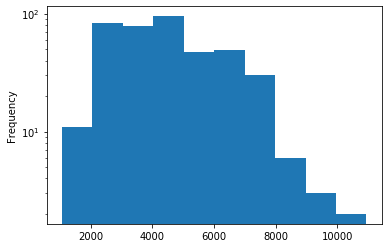

In [120]:
y_train.plot(kind = "hist", log= True) #loglog=True

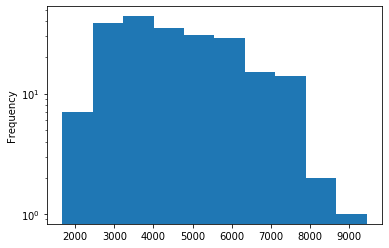

In [121]:
preds.plot(kind = "hist", log= True)

In [122]:
# preds = np.expm1(preds)

In [123]:
# y_train = np.expm1(y_train)

In [124]:
# X_train.replace(0, 1, inplace = True)

In [125]:
# X_train.replace(-9.21034, 0, inplace = True)

In [126]:
# preds.replace(0, 1, inplace = True)

In [127]:
# preds.replace(-9.21034, 0, inplace = True)

In [128]:
y_test

Date
2018-06-01    6432.02
2018-06-02    7812.00
2018-06-03    5772.00
2018-06-04    5085.00
2018-06-05    4568.00
               ...   
2018-12-31    4845.00
2019-01-01    2623.00
2019-01-02    2102.00
2019-01-03    2223.00
2019-01-04    4055.00
Name: Gross Sales, Length: 217, dtype: float64

In [129]:
preds

2019-07-10    5551.326492
2019-07-11    7610.337194
2019-07-12    5415.184367
2019-07-13    4887.601714
2019-07-14    3616.091256
                 ...     
2020-02-07    3502.199870
2020-02-08    2491.493848
2020-02-09    2273.267186
2020-02-10    3138.252285
2020-02-11    4261.428707
Freq: D, Length: 217, dtype: float64

In [130]:
metrics.r2_score(y_test, preds)

0.9130341942355243

In [131]:
mse = mean_squared_error(y_test[0:len(y_test)], preds)

In [132]:
math.sqrt(mse)

458.6140378597415

In [133]:
preds

2019-07-10    5551.326492
2019-07-11    7610.337194
2019-07-12    5415.184367
2019-07-13    4887.601714
2019-07-14    3616.091256
                 ...     
2020-02-07    3502.199870
2020-02-08    2491.493848
2020-02-09    2273.267186
2020-02-10    3138.252285
2020-02-11    4261.428707
Freq: D, Length: 217, dtype: float64

In [134]:
y_train

Date
2018-06-01    6432.02
2018-06-02    7812.00
2018-06-03    5772.00
2018-06-04    5085.00
2018-06-05    4568.00
               ...   
2019-07-06    4645.00
2019-07-07    4198.00
2019-07-08    2704.00
2019-07-09    2683.00
2019-07-10    4178.00
Name: Gross Sales, Length: 404, dtype: float64

In [135]:
#exponeniate predS & Y because they are logged then graph 

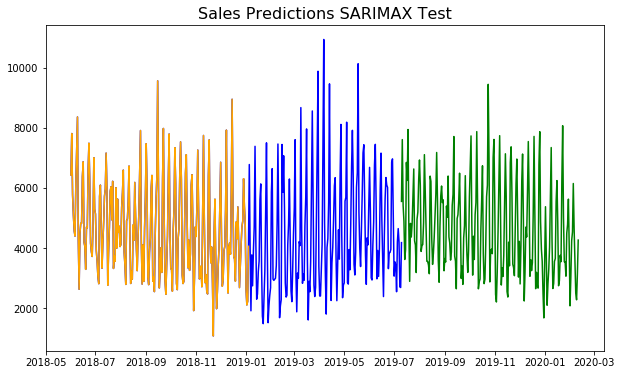

In [136]:
# #a Fit a SARIMA(0, 2, 1) x (1, 0, 0, 12) model.

# sarima = SARIMAX(endog = y_train.astype(float),
#                  order = (0, 2, 1),              # (p, d, q)
#                  seasonal_order = (1, 0, 0,2)) # (P, D, Q, S)

# # Fit SARIMA model.
# model = sarima.fit()

# Generate predictions based on test set.
# preds = model.predict(start=datetime(2020,3,1),
#                       end=datetime(2020,1,10))

# # # Evaluate predictions.
# print(mean_squared_error(y_test, preds))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(y_train, color = 'blue')
plt.plot(y_test, color = 'orange')
plt.plot(preds, color = 'green')
# plt.plot(future_forecast, color = 'black')

plt.title(label = 'Sales Predictions SARIMAX Test', fontsize=16)
plt.show();

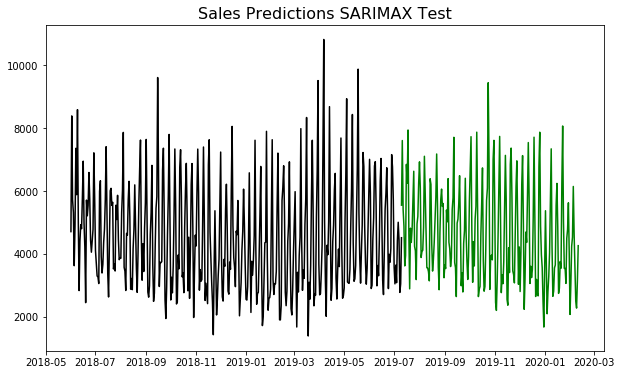

In [137]:

# Plot data.
plt.figure(figsize=(10,6))
# plt.plot(y_train, color = 'blue')
# plt.plot(y_test, color = 'orange')
plt.plot(preds, color = 'green')
plt.plot(future_forecast, color = 'black')

plt.title(label = 'Sales Predictions SARIMAX Test', fontsize=16)
plt.show();
